<h1 align='center'> 영상처리 프로그래밍 실습 11</h1>

<h6 align='right'> 2022. 5. 31. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 6월 6일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 지난 주 문제 1. 
 
예제 2를 다음과 같이 변경하라.

- k-Means algorithm으로 구한 cluster centers 대신에 임의의 색을 지정하는 방법으로 벡터 양자화한 영상의 색을 변경하라.
- Matplotlib의 cm 모듈이 제공하는 colormap 중에서 다음과 같은 Listed color maps를 사용하라.

listed_color_maps = [cm.viridis, cm.plasma, cm.inferno, 
                     cm.magma, cm.cividis, cm.twilight, cm.twilight_shifted]

In [2]:
import cv2
import numpy as np
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn import cluster

def onSelectColor(val):
    global color_selection
    color_selection = val
    show_quantized_image()


def onKMeans(val):
    global K, img_labels, kmeans
    K = val
    kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)
    img_labels = kmeans.predict(img).reshape(scenery.shape[:2])
    show_quantized_image()

def show_quantized_image():
    global quantized_colors, img_vq
    if color_selection == 0:
        img_vq = scenery
    elif color_selection == 1:
        quantized_colors = kmeans.cluster_centers_.round().astype(np.uint8)
        img_vq = quantized_colors[img_labels]
    else:
        cmap = listed_color_maps[color_selection]
        step = 256 // K
        quantized_colors = (255*np.array(cmap.colors[::step])).round().astype(np.uint8)
        quantized_colors = quantized_colors[...,::-1]
        img_vq = quantized_colors[img_labels]
    scenery_vq = img_vq.reshape(scenery.shape)
    cv2.imshow(winName, img_vq)

filename = 'beach_640.jpg'
scenery = cv2.imread(filename)
N = 3000
img = scenery.reshape(-1, 3)
img_sample = shuffle(img, random_state=0)[:N]
K = 3

listed_color_maps = ['original', 'K-means', cm.viridis, cm.plasma, cm.inferno, 
                     cm.magma, cm.cividis, cm.twilight, cm.twilight_shifted]

quantized_colors = np.zeros((K, 3), np.uint8)
img_labels = np.zeros(img.shape[0], np.int32)
kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)


winName = "Image Pseudo Coloring"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
color_selection = 0
cmap = listed_color_maps[color_selection]

img_vq = np.empty_like(img)
onKMeans(K)
show_quantized_image()

cv2.createTrackbar('K-Means', winName, K, 15, onKMeans)
cv2.setTrackbarMin('K-Means', winName, 2)

cv2.createTrackbar('Color Map', winName, color_selection, len(listed_color_maps)-1, onSelectColor)
cv2.setTrackbarMin('Color Map', winName, 0)


cv2.waitKey(0)
cv2.destroyAllWindows()

## 예제 1.

MNIST handwritten digits dataset를 이용해서 숫자 인식 프로그램을 만들려고 한다.

### 1.1

다음 조건을 만족하는 프로그램을 작성하라.


1. 화면에 검은색 화면을 표시하는 창을 표시하고, OpenCV의 마우스 이벤트 처리 기능을 이용해서 마우스가 움직이는 궤적을 흰색으로 표시하라. 단, 마우스 궤적에 따라 선을 그릴 수 있는 영역의 크기는 MNIST handwritten digits 영상 크기인 28 x 28의 배수로 선택하라. (예: 280 x 280)
2. 왼쪽 마우스 버튼을 누른 상태에서 마우스를 움직일 때만 곡선이 그려진다.
3. 키보드에서 'c'를 누르면 화면이 지워진다.
3. 키보드에서 'q'를 누르면 프로그램이 종료된다.

In [22]:
def onDraw(event, x, y, flags, params):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pts.append((x,y))
            cv2.line(canvas, pts[-2], pts[-1], (255,255,255))
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    cv2.imshow(winName, canvas)

drawing = False
pts = []
SCALE=10
WIDTH,HEIGHT=28,28

canvas=np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
winName='Digit Recognition'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, canvas)

cv2.setMouseCallback(winName, onDraw)
while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
        cv2.imshow(winName, canvas)

cv2.destroyAllWindows()


### 1.2

MNIST의 글자와 마우스로 쓴 글자외 비슷하도록 마우스로 쓴 선의 굵기를 조절하려고 한다.
MNIST의 훈련 집합의 첫 세 글자자와 마우스로 쓴 글자를 화면에 표시해서 선의 굵기를 비교하라.

단, 마우스로 쓴 글자 영상의 크기를 MNIST 영상과 같은 크기로 축소해서 비교해야 한다.

In [35]:
import mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()
train_images.shape

(60000, 28, 28)

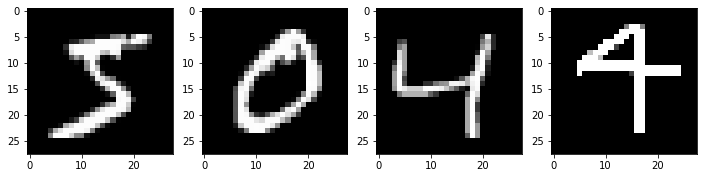

In [43]:
fig, ax = plt.subplots(1,4,figsize=(12,3))
for n in range(3):
    ax[n].imshow(train_images[n], cmap='gray')
digit = cv2.cvtColor(canvas,cv2.COLOR_BGR2GRAY)
digit=cv2.resize(digit, (train_images.shape[1:]))
ax[3].imshow(digit, cmap='gray')
plt.show()

In [48]:
def compare_digits():
    fig, ax = plt.subplots(1,4,figsize=(12,3))
    for n in range(3):
        ax[n].imshow(train_images[n], cmap='gray')
    digit = cv2.cvtColor(canvas,cv2.COLOR_BGR2GRAY)
    digit=cv2.resize(digit, (train_images.shape[1:]))
    ax[3].imshow(digit, cmap='gray')
    plt.show()

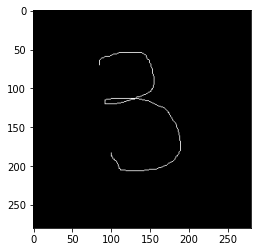

In [24]:
plt.imshow(canvas)

In [23]:
def onDraw(event, x, y, flags, params):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pts.append((x,y))
            cv2.line(canvas, pts[-2], pts[-1], (255,255,255))
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    cv2.imshow(winName, canvas)
    
drawing = False
pts = []
SCALE=10
WIDTH,HEIGHT=28,28

canvas=np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
winName='Digit Recognition'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, canvas)

cv2.setMouseCallback(winName, onDraw)
while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
        cv2.imshow(winName, canvas)

cv2.destroyAllWindows()


### 1.3 

예제 1.2를 참조해서 trackbar 인터페이스를 이용해서 선의 굵기를 조정할 수 있도록 에제 1.1에서 작성한 프로그램을 수정하라.

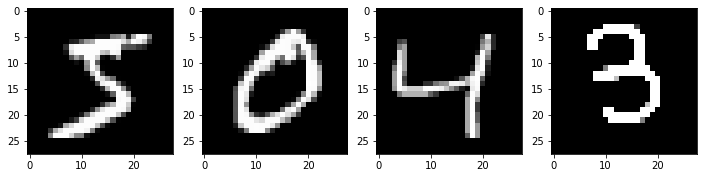

In [59]:
def onPenThickness(val):
    global pen_thickness
    pen_thickness = val

def onDraw(event, x, y, flags, params):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pts.append((x,y))
            cv2.line(canvas, pts[-2], pts[-1], (255,255,255), thickness=pen_thickness)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    cv2.imshow(winName, canvas)

drawing = False
pts = []
SCALE=10
WIDTH,HEIGHT=28,28
pen_thickness = 20

canvas=np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
winName='Digit Recognition'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, canvas)
cv2.createTrackbar("thickness", winName, pen_thickness, 40, onPenThickness)
cv2.setTrackbarMin("thickness", winName, 20)

cv2.setMouseCallback(winName, onDraw)
while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
        cv2.imshow(winName, canvas)

cv2.destroyAllWindows()

compare_digits()


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import mnist

train_images = mnist.train_images()

digit=cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
digit=cv2.GaussianBlur(digit,(45,45), 4.)
img=cv2.resize(digit,(28,28))

cv2.namedWindow("MNIST digit", flags=cv2.WINDOW_NORMAL)
cv2.imshow("MNIST digit", img)
cv2.waitKey()
cv2.destroyAllWindows()

### 1.4

예제 1.3에서 만든 글자와 MNIST의 글자 사이에 어떤 차이가 있는지 살펴 보고 마우스로 만든 글자의 특성이 MNIST 글자와 비슷하게 조작하는 방법을 생각해 보고 프로그램을 보완하라.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mnist

train_images = mnist.train_images()

digit=cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
digit=cv2.GaussianBlur(digit,(45,45), 4.)
img=cv2.resize(digit,(28,28))

cv2.namedWindow("MNIST digit", flags=cv2.WINDOW_NORMAL)
cv2.imshow("MNIST digit", img)
cv2.waitKey()
cv2.destroyAllWindows()

### 1.5

예제 1.4에서 찾은 방법을 고려해서 예제 1.3에 만든 프로그램을 보완하라.

단, 글자를 다 쓴 후에 오른쪽 마우스를 클릭했을 때, 예제 1.4에서 찾은 방법을 적용한 영상이 창에 표시되어야 한다.

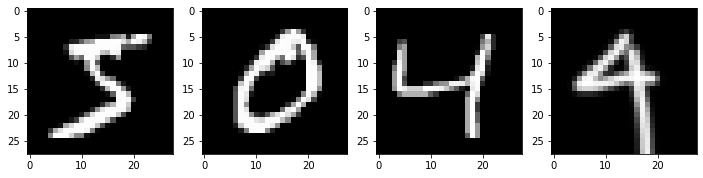

In [76]:
def onPenThickness(val):
    global pen_thickness
    pen_thickness = val

def onDraw(event, x, y, flags, params):
    global drawing,canvas
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pts.append((x,y))
            cv2.line(canvas, pts[-2], pts[-1], color, thickness=pen_thickness)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_RBUTTONUP:
        canvas=cv2.GaussianBlur(canvas,(45,45), 5.)

    cv2.imshow(winName, canvas)

drawing = False
pts = []
SCALE=10
WIDTH,HEIGHT=28,28
pen_thickness = 20
color=(253,253,253)

canvas=np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
winName='Digit Recognition'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, canvas)
cv2.createTrackbar("thickness", winName, pen_thickness, 40, onPenThickness)
cv2.setTrackbarMin("thickness", winName, 20)

cv2.setMouseCallback(winName, onDraw)
while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
        cv2.imshow(winName, canvas)

cv2.destroyAllWindows()

compare_digits()


### 1.6

예제 1.5의 프로그램에 kNN 분류기를 추가해서 마우스로 쓴 글자를 인식하는 프로그램을 작성하라.

단, 오른쪽 마우스 버튼을 클릭하면 print 함수를 이용해서 인식 결과를 콘솔에 출력하라.

KNeighborsClassifier()

3


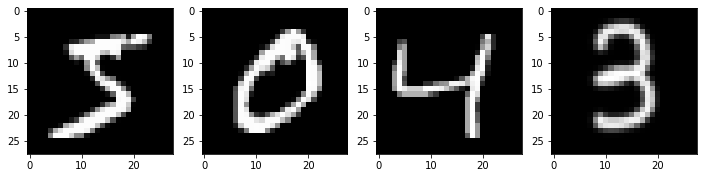

In [84]:
def onPenThickness(val):
    global pen_thickness
    pen_thickness = val

def onDraw(event, x, y, flags, params):
    global drawing,canvas
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pts.append((x,y))
            cv2.line(canvas, pts[-2], pts[-1], color, thickness=pen_thickness)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_RBUTTONUP:
        canvas=cv2.GaussianBlur(canvas,(45,45), 5.)
        digit=cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
        digit=cv2.resize(digit,(28,28))
        predict = knn.predict(digit.reshape(1,-1))[0]
        print(predict)

    cv2.imshow(winName, canvas)

from sklearn.neighbors import KNeighborsClassifier
K=5
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(train_images.reshape(train_images.shape[0],-1),train_labels)

drawing = False
pts = []
SCALE=10
WIDTH,HEIGHT=28,28
pen_thickness = 20
color=(253,253,253)

canvas=np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
winName='Digit Recognition'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, canvas)
cv2.createTrackbar("thickness", winName, pen_thickness, 40, onPenThickness)
cv2.setTrackbarMin("thickness", winName, 20)

cv2.setMouseCallback(winName, onDraw)
while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
        cv2.imshow(winName, canvas)

cv2.destroyAllWindows()

compare_digits()


### 1.7

cv2.putText 함수의 사용법을 조사해서, 예제 1.6의 프로그램을 수정하여 마우스로 쓴 글자의 인식 결과를 입력 영상 옆에 별도의 영상으로 출력하라.

In [100]:
img = np.zeros((400,400,3),np.uint8)

cv2.putText(img,'test',(20,300),cv2.FONT_HERSHEY_PLAIN,5,(255,255,255),8)
cv2.imshow(winName, img)
cv2.waitKey()
cv2.destroyAllWindows()

In [111]:
def onPenThickness(val):
    global pen_thickness
    pen_thickness = val

def onDraw(event, x, y, flags, params):
    global drawing,canvas,canvas_extended,text_pane
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pts.append((x,y))
            cv2.line(canvas, pts[-2], pts[-1], color, thickness=pen_thickness)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_RBUTTONUP:
        canvas=cv2.GaussianBlur(canvas,(45,45), 5.)
        digit=cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
        digit=cv2.resize(digit,(28,28))
        predict = knn.predict(digit.reshape(1,-1))[0]
        text_pane = np.full((HEIGHT*SCALE, WIDTH*SCALE,3), (128,128,128) ,np.uint8)
        text_pane = cv2.putText(text_pane, str(predict), (100,200), cv2.FONT_HERSHEY_PLAIN, 10, (255,255,255), 3)

    canvas_extended = np.hstack((canvas, text_pane))
    cv2.imshow(winName, canvas_extended)

from sklearn.neighbors import KNeighborsClassifier
K=5
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(train_images.reshape(train_images.shape[0],-1),train_labels)

drawing = False
pts = []
SCALE=10
WIDTH,HEIGHT=28,28
pen_thickness = 20
color=(253,253,253)

canvas=np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
text_pane = np.full((HEIGHT*SCALE, WIDTH*SCALE,3), (128,128,128) ,np.uint8)
cv2.putText(text_pane, '?', (100,200), cv2.FONT_HERSHEY_PLAIN, 10, (255,255,255), 3)
canvas_extended=np.hstack((canvas,text_pane))

winName='Digit Recognition'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)
cv2.imshow(winName, canvas_extended)
cv2.createTrackbar("thickness", winName, pen_thickness, 40, onPenThickness)
cv2.setTrackbarMin("thickness", winName, 20)

cv2.setMouseCallback(winName, onDraw)
while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE,3),np.uint8)
        text_pane = np.full((HEIGHT*SCALE, WIDTH*SCALE,3), (128,128,128) ,np.uint8)
        cv2.putText(text_pane, '?', (100,200), cv2.FONT_HERSHEY_PLAIN, 10, (255,255,255), 3)
        canvas_extended=np.hstack((canvas,text_pane))
        cv2.imshow(winName, canvas_extended)

cv2.destroyAllWindows()


In [ ]:
[e for e in dir(cv2) if 'FONT_' in e]

['FONT_HERSHEY_COMPLEX',
 'FONT_HERSHEY_COMPLEX_SMALL',
 'FONT_HERSHEY_DUPLEX',
 'FONT_HERSHEY_PLAIN',
 'FONT_HERSHEY_SCRIPT_COMPLEX',
 'FONT_HERSHEY_SCRIPT_SIMPLEX',
 'FONT_HERSHEY_SIMPLEX',
 'FONT_HERSHEY_TRIPLEX',
 'FONT_ITALIC',
 'QT_FONT_BLACK',
 'QT_FONT_BOLD',
 'QT_FONT_DEMIBOLD',
 'QT_FONT_LIGHT',
 'QT_FONT_NORMAL']

## 문제 1

예제 1에서 만든 프로그램에 마우스로 글자를 쓰다 보면 인식이 잘 되지 않는 경우가 발생한다. 이를 해소하기 위해서 인식 결과를 확인할 수 있도록 가장 가까운 글자 K 개를 화면에 보여주는 프로그램을 작성하라.

knn.kneighbors 메소드를 활용하면 k 개의 최근접 결과를 확인할 수 있다.